In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns

from statannot import add_stat_annotation
from sklearn import metrics


import scipy.stats as stats

from grs_pca import perform_grs_pca

/slade/home/pl450/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from survival_analysis.utilities_mod import * 
from survival_analysis.stratifiedKM_plot import * 
#

In [3]:
prefix = '/slade/home/pl450/Uveitis/GRS/python_analysis/'
data = (pd
        .read_csv(prefix + 'allGRS_forROCAUC_220524.tsv',
                  sep='\t', low_memory=False)
        .dropna(subset=['Sex']))

In [4]:
data = pd.get_dummies(data, columns = ['Sex'], drop_first=False)
data.drop(labels='Sex_Male', axis=1, inplace=True)
data.loc[data.white_british!=1, 'white_british'] = 0

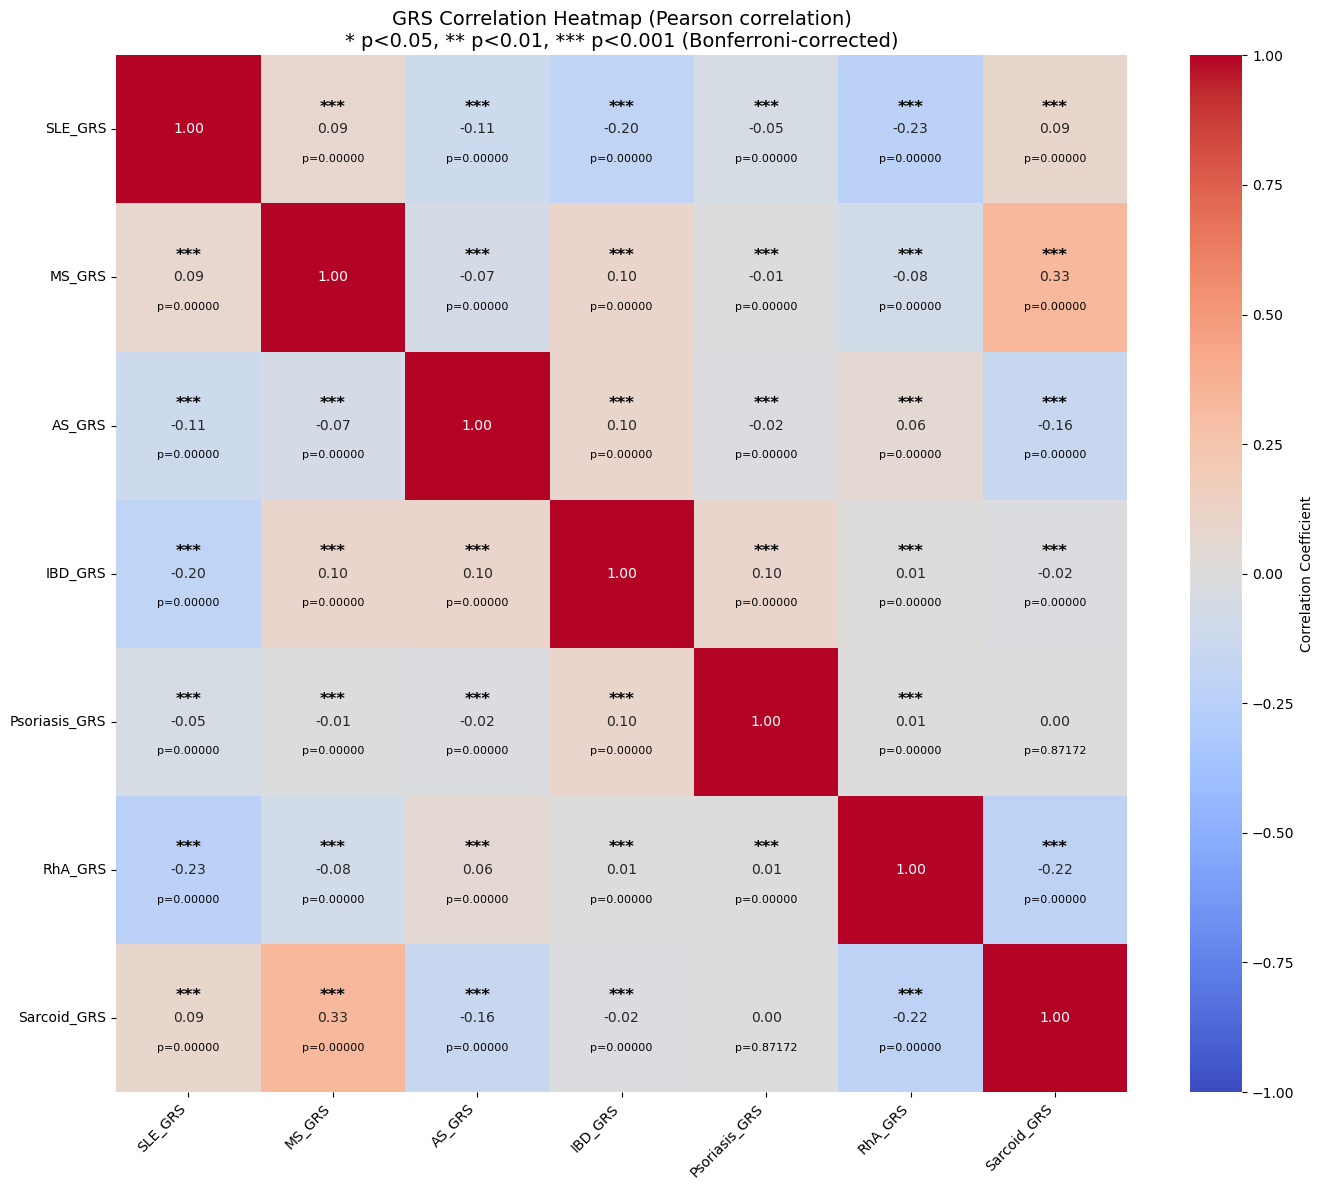


Correlation Matrix:
               SLE_GRS  MS_GRS  AS_GRS  IBD_GRS  Psoriasis_GRS  RhA_GRS  \
SLE_GRS           1.00    0.09   -0.11    -0.20          -0.05    -0.23   
MS_GRS            0.09    1.00   -0.07     0.10          -0.01    -0.08   
AS_GRS           -0.11   -0.07    1.00     0.10          -0.02     0.06   
IBD_GRS          -0.20    0.10    0.10     1.00           0.10     0.01   
Psoriasis_GRS    -0.05   -0.01   -0.02     0.10           1.00     0.01   
RhA_GRS          -0.23   -0.08    0.06     0.01           0.01     1.00   
Sarcoid_GRS       0.09    0.33   -0.16    -0.02           0.00    -0.22   

               Sarcoid_GRS  
SLE_GRS               0.09  
MS_GRS                0.33  
AS_GRS               -0.16  
IBD_GRS              -0.02  
Psoriasis_GRS         0.00  
RhA_GRS              -0.22  
Sarcoid_GRS           1.00  

Bonferroni-adjusted P-values:
               SLE_GRS  MS_GRS  AS_GRS  IBD_GRS  Psoriasis_GRS  RhA_GRS  \
SLE_GRS            0.0     0.0     0.0  

In [11]:
grs_list = ['SLE_GRS', 'MS_GRS','AS_GRS', 'IBD_GRS',
            'Psoriasis_GRS', 'RhA_GRS', 'Sarcoid_GRS']  # Add all your GRS column names here
plot_grs_correlation_heatmap(data, grs_list, method='pearson')

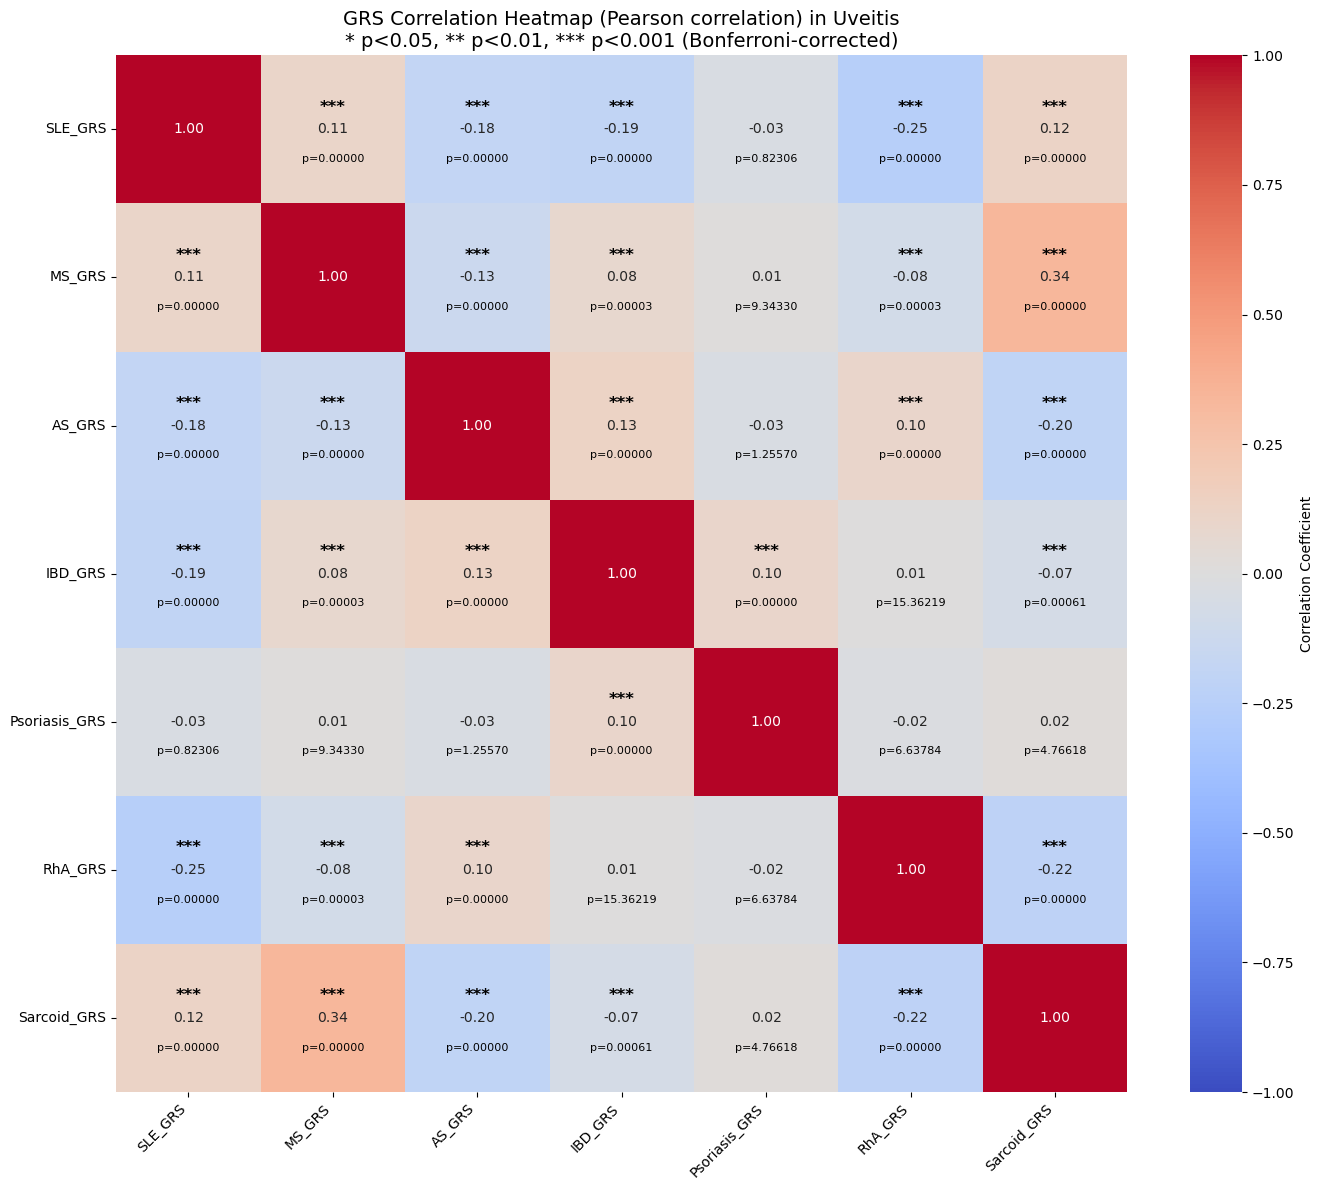


Correlation Matrix:
               SLE_GRS  MS_GRS  AS_GRS  IBD_GRS  Psoriasis_GRS  RhA_GRS  \
SLE_GRS           1.00    0.11   -0.18    -0.19          -0.03    -0.25   
MS_GRS            0.11    1.00   -0.13     0.08           0.01    -0.08   
AS_GRS           -0.18   -0.13    1.00     0.13          -0.03     0.10   
IBD_GRS          -0.19    0.08    0.13     1.00           0.10     0.01   
Psoriasis_GRS    -0.03    0.01   -0.03     0.10           1.00    -0.02   
RhA_GRS          -0.25   -0.08    0.10     0.01          -0.02     1.00   
Sarcoid_GRS       0.12    0.34   -0.20    -0.07           0.02    -0.22   

               Sarcoid_GRS  
SLE_GRS               0.12  
MS_GRS                0.34  
AS_GRS               -0.20  
IBD_GRS              -0.07  
Psoriasis_GRS         0.02  
RhA_GRS              -0.22  
Sarcoid_GRS           1.00  

Bonferroni-adjusted P-values:
               SLE_GRS   MS_GRS  AS_GRS   IBD_GRS  Psoriasis_GRS   RhA_GRS  \
SLE_GRS        0.00000  0.00000  0.00

In [12]:
plot_grs_correlation_heatmap(data, grs_list, method='pearson', uveitis=True)

In [6]:
# pca, df_pca = perform_grs_pca(data, grs_list,disease_column='Sarcoid_any', uveitis=True)

In [76]:
data[data.uve_any==1].MS_any.value_counts()

0.0    3518
1.0      44
Name: MS_any, dtype: int64

Welch's t-test results for Psoriasis vs Other Cases on Psoriasis_GRS:
t-statistic: 6.5710, p-value: 0.0000
Welch's t-test results for MS vs Other Cases on MS_GRS:
t-statistic: 5.5326, p-value: 0.0000


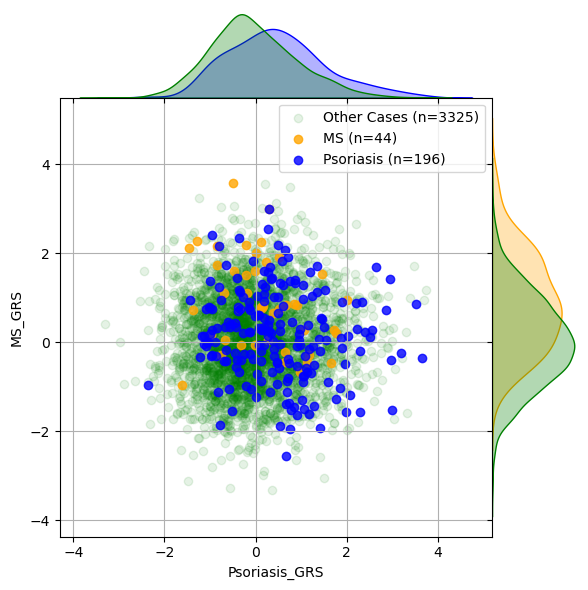

In [17]:
plot_grs(data,'Psoriasis_GRS','MS_GRS', disease1='Psoriasis_any',disease2 = 'MS_any',
         a2=0.8, filter_col='uve_any', uveitis=True)

Welch's t-test results for Psoriasis vs Other Cases on Psoriasis_GRS:
t-statistic: 2.5269, p-value: 0.0133
Welch's t-test results for MS vs Other Cases on MS_GRS:
t-statistic: 4.0120, p-value: 0.0005


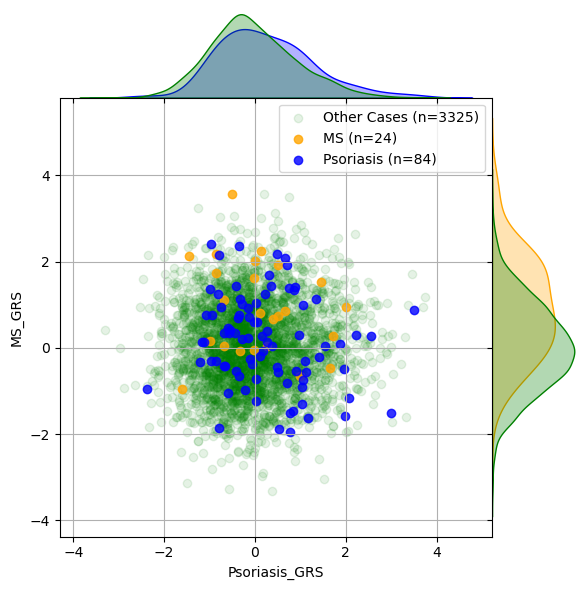

In [25]:
data.loc[data['first_Psoriasis']!=1, 'first_Psoriasis'] = 0
plot_grs(data,'Psoriasis_GRS','MS_GRS', disease1='Psoriasis_any',disease2 = 'MS_any',
         a2=0.8, filter_col='uve_any', uveitis=True, additional_filter={'first_Psoriasis':0, 'first_MS':0})

Welch's t-test results for RA vs Other Cases on RhA_GRS:
t-statistic: 4.9016, p-value: 0.0000
Welch's t-test results for MS vs Other Cases on MS_GRS:
t-statistic: 5.4652, p-value: 0.0000


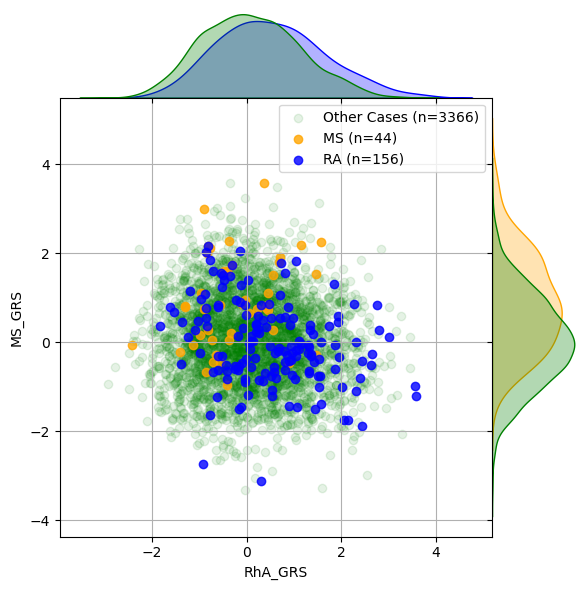

In [16]:
plot_grs(data,'RhA_GRS','MS_GRS', disease1='RA_any',disease2 = 'MS_any',
         a2=0.8, filter_col='uve_any', uveitis=True)

Welch's t-test results for MS vs Other Cases on MS_GRS:
t-statistic: 5.5005, p-value: 0.0000
Welch's t-test results for IBD vs Other Cases on IBD_GRS:
t-statistic: 5.6029, p-value: 0.0000


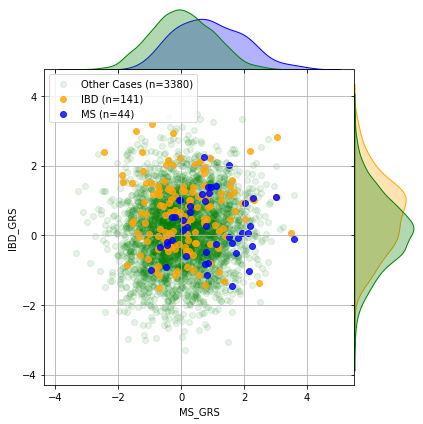

In [24]:
plot_grs(data,'MS_GRS','IBD_GRS', disease2='IBD_any',disease1 = 'MS_any',
         a2=0.8, filter_col='uve_any', uveitis=True)

Welch's t-test results for IBD vs Other Cases on IBD_GRS:
t-statistic: 5.7728, p-value: 0.0000
Welch's t-test results for AS vs Other Cases on AS_GRS:
t-statistic: 24.7275, p-value: 0.0000


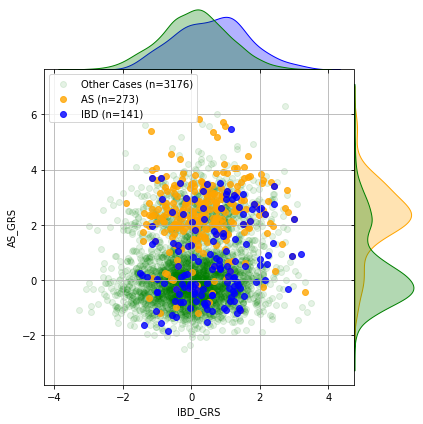

In [15]:
plot_grs(data,'IBD_GRS','AS_GRS', disease1='IBD_any',disease2 = 'AS_any',
         a2=0.8, filter_col='uve_any', uveitis=True)

Welch's t-test results for Crohns vs Other Cases on IBD_GRS:
t-statistic: 3.8459, p-value: 0.0002
Welch's t-test results for AS vs Other Cases on AS_GRS:
t-statistic: 24.7032, p-value: 0.0000


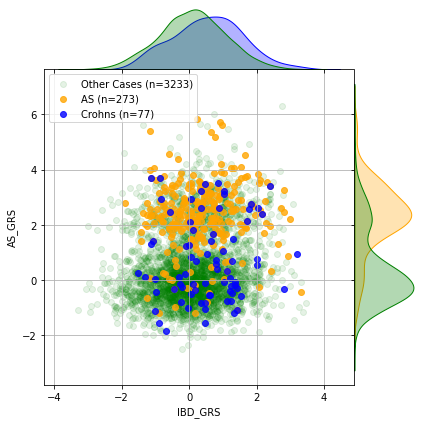

In [17]:
plot_grs(data,'IBD_GRS','AS_GRS', disease1='Crohns_any',disease2 = 'AS_any',
         a2=0.8, filter_col='uve_any', uveitis=True)

Welch's t-test results for UC vs Other Cases on IBD_GRS:
t-statistic: 5.1910, p-value: 0.0000
Welch's t-test results for AS vs Other Cases on AS_GRS:
t-statistic: 24.7847, p-value: 0.0000


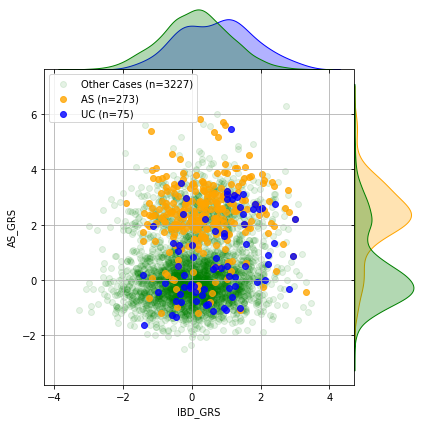

In [21]:
plot_grs(data,'IBD_GRS','AS_GRS', disease1='UC_any',disease2 = 'AS_any',
         a2=0.8, filter_col='uve_any', uveitis=True)

Welch's t-test results for UC vs Other Cases on IBD_GRS:
t-statistic: 2.3622, p-value: 0.0320
Welch's t-test results for AS vs Other Cases on AS_GRS:
t-statistic: 24.1899, p-value: 0.0000


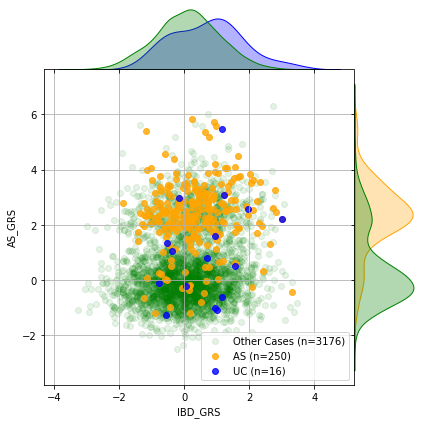

In [28]:
plot_grs(data,'IBD_GRS','AS_GRS', disease1='UC_any',
         disease2 = 'AS_any',
         a2=0.8, filter_col='uve_any',
         uveitis=True,additional_filter={'first_IBD':0, 'Crohns_any':0} )

Welch's t-test results for Crohns vs Other Cases on IBD_GRS:
t-statistic: -0.0656, p-value: 0.9483
Welch's t-test results for AS vs Other Cases on AS_GRS:
t-statistic: 24.3247, p-value: 0.0000


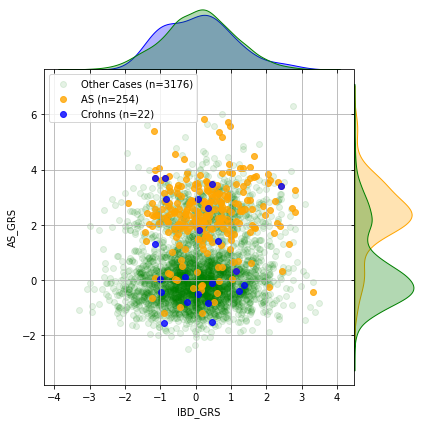

In [31]:
plot_grs(data,'IBD_GRS','AS_GRS', disease1='Crohns_any',
         disease2 = 'AS_any',
         a2=0.8, filter_col='uve_any',
         uveitis=True,additional_filter={'first_IBD':0, 'UC_any':0} )

Welch's t-test results for MS vs Other Cases on MS_GRS:
t-statistic: 5.3355, p-value: 0.0000
Welch's t-test results for IBD vs Other Cases on IBD_GRS:
t-statistic: 1.6138, p-value: 0.1140


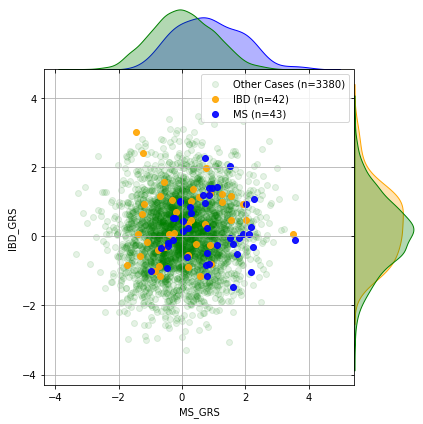

In [20]:
plot_grs(data,'MS_GRS','IBD_GRS', disease2='IBD_any',disease1 = 'MS_any',
         a2=0.9, filter_col='uve_any',uveitis=True, additional_filter={'first_IBD':0})

Welch's t-test results for MS vs Other Cases on MS_GRS:
t-statistic: 4.0707, p-value: 0.0005
Welch's t-test results for UC vs Other Cases on IBD_GRS:
t-statistic: 2.1924, p-value: 0.0470


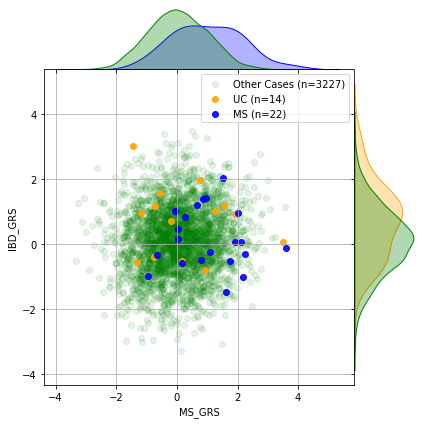

In [9]:
plot_grs(data,'MS_GRS','IBD_GRS', disease2='UC_any',disease1 = 'MS_any',
         a2=0.9, filter_col='uve_any',uveitis=True,
         additional_filter={'first_IBD':0, 'first_MS':0, 'Crohns_any':0,'first_AS':0})

Welch's t-test results for MS vs Other Cases on MS_GRS:
t-statistic: 4.0577, p-value: 0.0006
Welch's t-test results for AS vs Other Cases on AS_GRS:
t-statistic: 11.4847, p-value: 0.0000


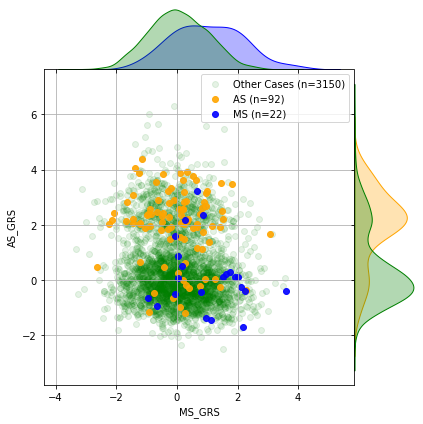

In [10]:
plot_grs(data,'MS_GRS','AS_GRS', disease2='AS_any',disease1 = 'MS_any',
         a2=0.9, filter_col='uve_any',uveitis=True,
         additional_filter={'first_IBD':0, 'first_MS':0, 'Crohns_any':0,'first_AS':0})

Welch's t-test results for MS vs Other Cases on MS_GRS:
t-statistic: 4.0709, p-value: 0.0005
Welch's t-test results for SLE vs Other Cases on SLE_GRS:
t-statistic: 2.5527, p-value: 0.0507


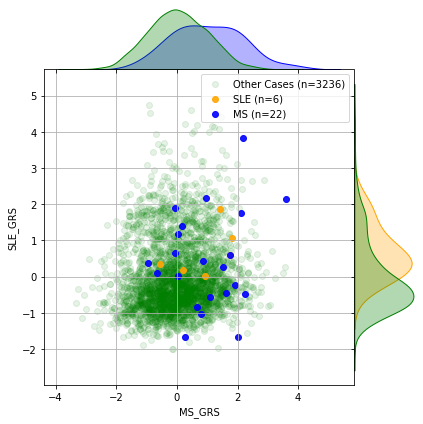

In [11]:
plot_grs(data,'MS_GRS','SLE_GRS', disease2='SLE_any',disease1 = 'MS_any',
         a2=0.9, filter_col='uve_any',uveitis=True,
         additional_filter={'first_IBD':0, 'first_MS':0, 'Crohns_any':0,'first_AS':0})

### Survival Analysis

In [7]:
data.loc[data.first_uve_MS!=1, 'first_uve_MS'] = 0


In [8]:
controls = data.loc[((data.MS_any!=1) & (data.uve_any!=1))]
MS_group = data.loc[((data.MS_any==1) & (data.uve_any!=1))]
Uve_group = data.loc[((data.MS_any!=1) & (data.uve_any==1))]
Uve_and_MS_group = data.loc[((data.MS_any==1) & (data.uve_any==1))]

In [9]:
controls = data.loc[((data.MS_any!=1) & (data.uve_any!=1))]
MS_group = data.loc[((data.MS_any==1) & (data.uve_any!=1))]
Uve_group = data.loc[((data.MS_any!=1) & (data.uve_any==1))]
Uve_and_MS_group = data.loc[((data.MS_any==1) & (data.uve_any==1))]
controls['Uve_group'] = 'Controls'
MS_group['Uve_group'] = 'MS only'
Uve_and_MS_group['Uve_group'] = 'MS-Uve'
Uve_group['Uve_group'] = 'Undif Uveitis'

/tmp/ipykernel_3739985/2363133940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  controls['Uve_group'] = 'Controls'
/tmp/ipykernel_3739985/2363133940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MS_group['Uve_group'] = 'MS only'
/tmp/ipykernel_3739985/2363133940.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [10]:
# Define font styles for ticks on axes
tick_font = {
    'family': 'sans-serif',  # Font family for the tick labels
    'weight': 'medium',  # Font weight for the tick labels (e.g., 'medium')
    'size': 7,  # Font size for the tick labels
}

# Define font styles for labels
label_font = {
    'family': 'sans-serif',  # Font family for the label text
    'weight': 'medium',  # Font weight for the label text (e.g., 'medium')
    'size': 10,  # Font size for the label text
}

# Set the font style for tick labels using the defined 'tick_font'
plt.rc('font', **tick_font)

# Define the width of a figure with double-column layout (for publishing requirements)
double_col_width = 7.0867

# Define the width of a figure with single-column layout (for publishing requirements)
col_width = 3.46457

In [52]:
def plot_grs(data, disease_col, grs_col, uveitis_col='uve_any',
             colours = ['lightgreen', 'orange', 'red', 'steelblue']):
    """
    Plot GRS for different groups based on disease and uveitis diagnosis.

    Parameters:
    data (pd.DataFrame): DataFrame containing the data.
    disease_col (str): Column name for the disease indicator (e.g., 'MS_any' or 'IBD_any').
    grs_col (str): Column name for the genetic risk score (e.g., 'MS_GRS' or 'IBD_GRS').
    uveitis_col (str): Column name for the uveitis indicator. Default is 'uve_any'.
    """
    
    # Strip _any from the disease name for labels
    disease_name = disease_col.replace('_any', '')
    
    # Define groups
    controls = data.loc[(data[disease_col] != 1) & (data[uveitis_col] != 1)]
    MS_group = data.loc[(data[disease_col] == 1) & (data[uveitis_col] != 1)]
    Uve_group = data.loc[(data[disease_col] != 1) & (data[uveitis_col] == 1)]
    Uve_and_MS_group = data.loc[(data[disease_col] == 1) & (data[uveitis_col] == 1)]
    
    controls['Uve_group'] = 'Controls'
    MS_group['Uve_group'] = f'{disease_name} only'
    Uve_and_MS_group['Uve_group'] = f'{disease_name}-Uve'
    Uve_group['Uve_group'] = 'Undif Uveitis'
    
    # Concatenate all the groups into one dataframe
    concatenated_df = pd.concat([controls, MS_group, Uve_group, Uve_and_MS_group])

    # Plotting histogram + KDE for all groups
    kwargs = dict(kde_kws={'linewidth': 1.2, "bw_adjust": .95}, hist_kws={'alpha': .12}, rug_kws={'alpha': 0.8, 'linewidth': .9, 'height': 0.2})
    plt.figure(figsize=(double_col_width, 3.504), dpi= 300, facecolor=None)

    # Listing all groups, labels and colors to be plotted
    groups = [controls[grs_col], Uve_group[grs_col], Uve_and_MS_group[grs_col], MS_group[grs_col]]
    labels = ['Controls', 'Undif Uveitis', f'{disease_name}-Uve', f'{disease_name} only']


    plt.subplot(121)

    # Iterate through each group and plot a distribution using seaborn's distplot
    for (group, label, colour) in zip(groups, labels, colours):
        sns.distplot(group, color=colour,
                     label="{pop_label}, n={len_df}".format(pop_label=label, len_df='{:,}'.format(len(group))),
                     **kwargs)

    plt.xlabel(grs_col)
    plt.ylabel("Density")
    plt.xlim([-3, 5])
    leg = plt.legend(prop={'size': 6})
    for lh in leg.legendHandles:
        lh.set_alpha(0.8)

    plt.subplot(122)

    # Create palette for the violin plot
    upd_pal = dict(zip(labels, colours))

    ax = sns.violinplot(x='Uve_group', y=grs_col, data=concatenated_df, inner='box', palette=upd_pal, order=upd_pal.keys(),
                        linewidth=1.1, orient='v')
    ax.set_xlabel('Group')
    ax.set_ylabel(grs_col)

    for violin, alpha in zip(ax.collections[::2], [0.85, 0.85, 0.8, 0.8]):
        violin.set_alpha(alpha)

    # Add statistical annotations to the violin plot
    add_stat_annotation(ax, data=concatenated_df, x='Uve_group', y=grs_col, order=upd_pal.keys(),
                        box_pairs=[(f"{disease_name}-Uve", f"{disease_name} only"), (f'{disease_name}-Uve', 'Undif Uveitis'),
                                   ('Undif Uveitis', "Controls"), ('Undif Uveitis', f"{disease_name} only")],
                        test='t-test_welch', text_format='star', loc='inside', verbose=3)

    plt.ylim([-2.8, 9])
    plt.tight_layout()
    plt.savefig(f'4_hist_{grs_col}.svg')
    plt.show()


/tmp/ipykernel_3739985/4162395812.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  controls['Uve_group'] = 'Controls'
/tmp/ipykernel_3739985/4162395812.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MS_group['Uve_group'] = f'{disease_name} only'
/tmp/ipykernel_3739985/4162395812.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MS-Uve v.s. MS only: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=3.923e-01
Undif Uveitis v.s. MS-Uve: Welch's t-test independent samples with Bonferroni correction, P_val=7.464e-06 stat=-5.493e+00
Controls v.s. Undif Uveitis: Welch's t-test independent samples with Bonferroni correction, P_val=1.802e-01 stat=-2.005e+00
Undif Uveitis v.s. MS only: Welch's t-test independent samples with Bonferroni correction, P_val=1.724e-173 stat=-2.934e+01


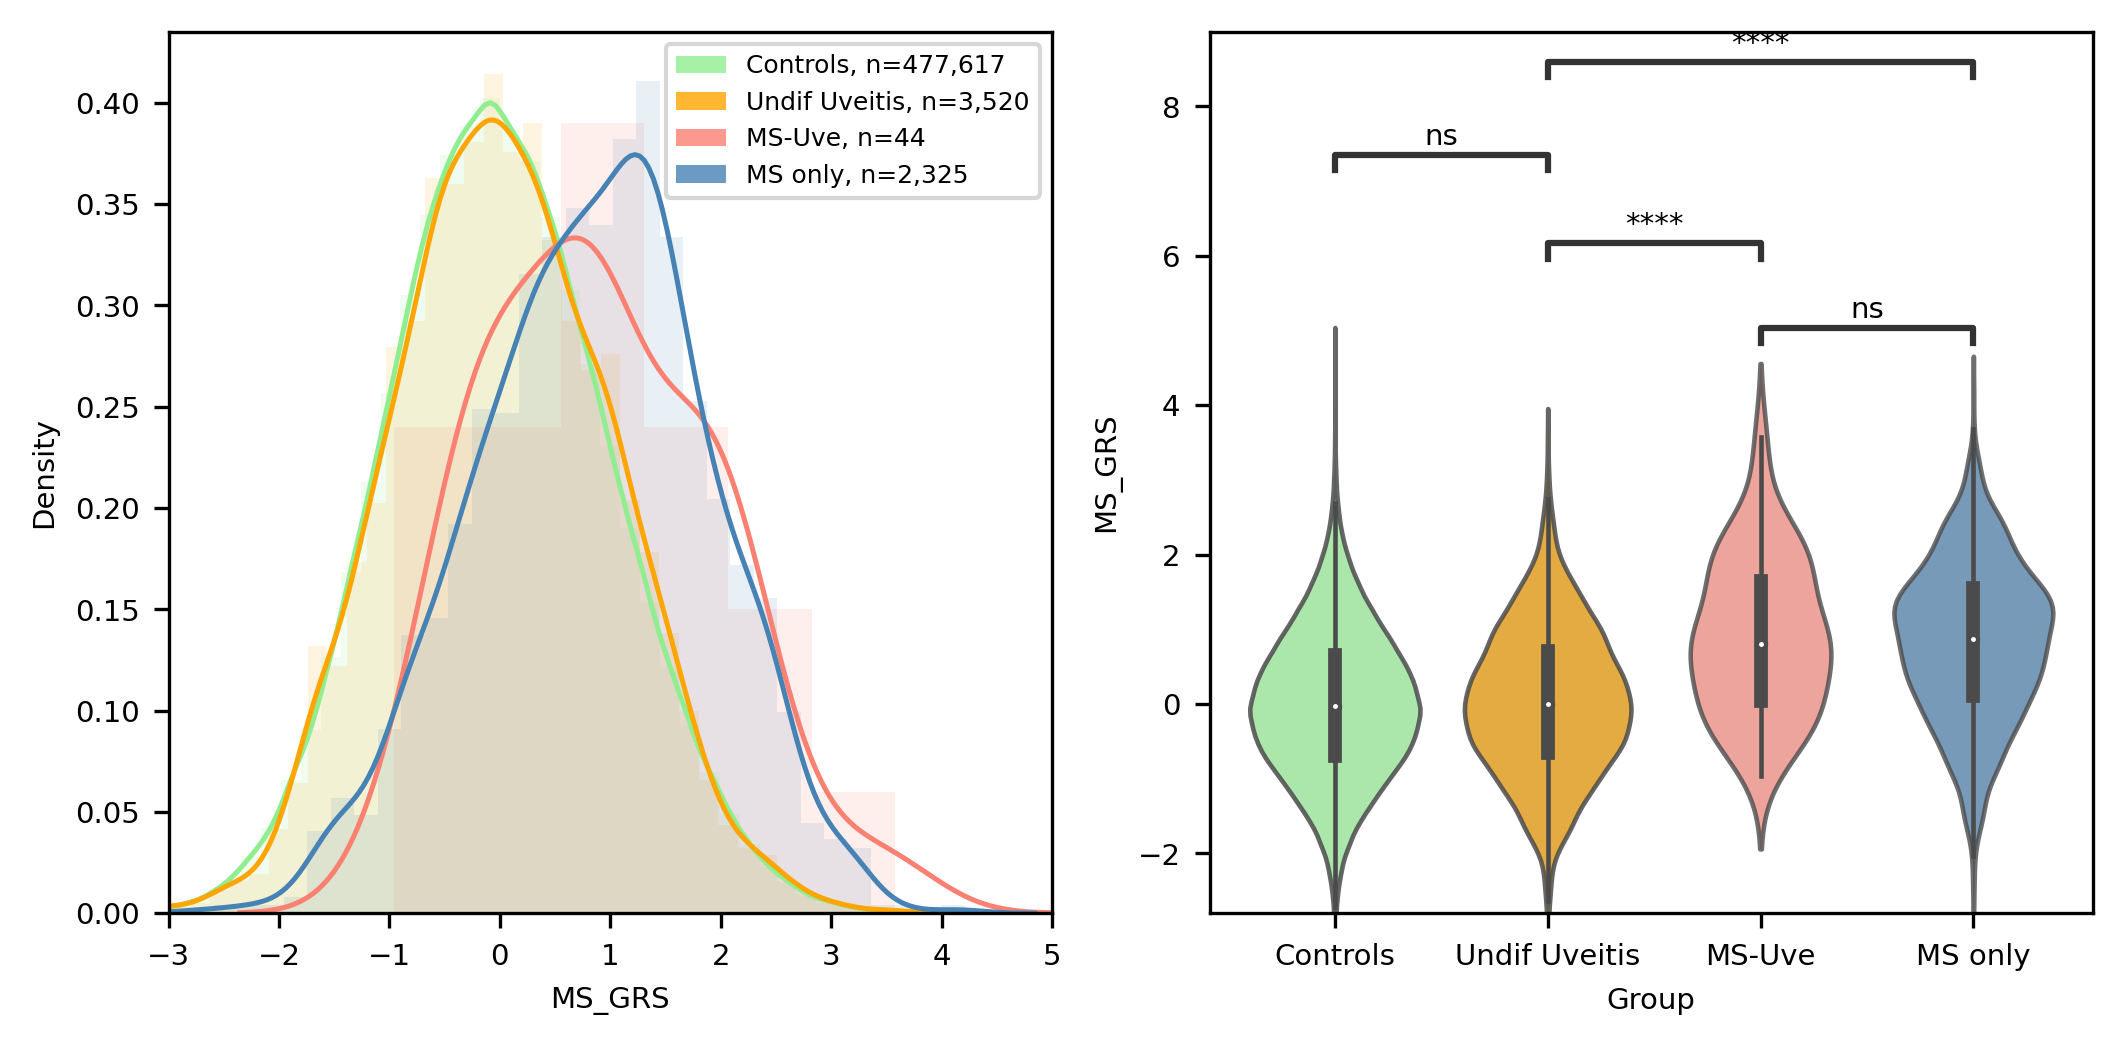

In [53]:
plot_grs(data, disease_col='MS_any', grs_col='MS_GRS',
        colours=['lightgreen', 'orange', 'salmon', 'steelblue'])

/tmp/ipykernel_3739985/4162395812.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  controls['Uve_group'] = 'Controls'
/tmp/ipykernel_3739985/4162395812.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MS_group['Uve_group'] = f'{disease_name} only'
/tmp/ipykernel_3739985/4162395812.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

UC-Uve v.s. UC only: Welch's t-test independent samples with Bonferroni correction, P_val=4.868e-01 stat=1.565e+00
Undif Uveitis v.s. UC-Uve: Welch's t-test independent samples with Bonferroni correction, P_val=1.173e-05 stat=-5.046e+00
Controls v.s. Undif Uveitis: Welch's t-test independent samples with Bonferroni correction, P_val=3.589e-11 stat=-6.845e+00
Undif Uveitis v.s. UC only: Welch's t-test independent samples with Bonferroni correction, P_val=1.123e-65 stat=-1.737e+01


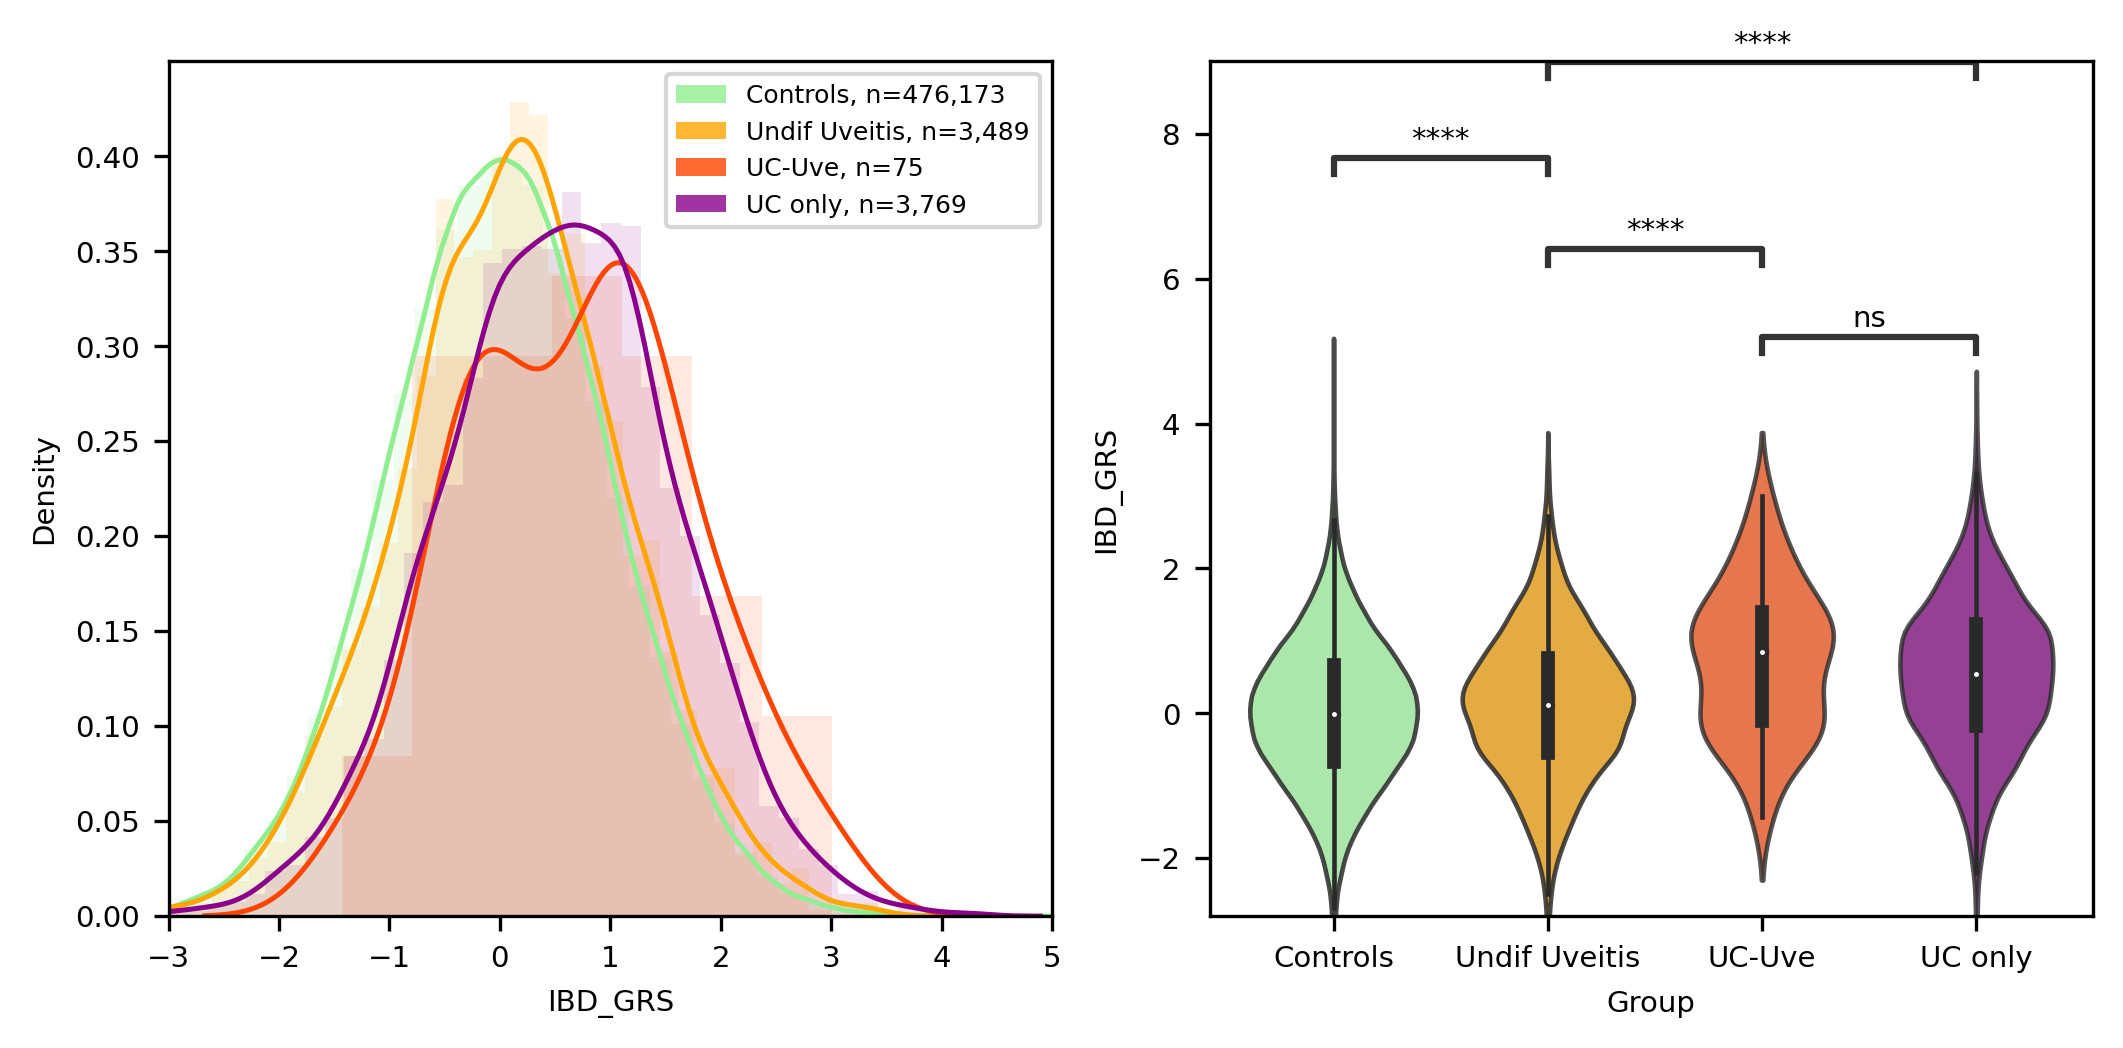

In [55]:
plot_grs(data, disease_col='UC_any', grs_col='IBD_GRS',
         colours=['lightgreen', 'orange', 'orangered', 'darkmagenta'])

In [12]:
from survival_analysis.backward_elimination import *
from  survival_analysis.stratifiedKM_plot import *
from survival_analysis.utilities_mod import *

In [13]:
data.loc[data.first_uve_MS!=1, 'first_uve_MS']=0
data.loc[data.first_uve_IBD!=1, 'first_uve_IBD']=0

In [14]:
data['age_uve_years'] = data['aao_uve']/12


data.loc[(data.age_uve_years >=18.0) & (data.age_uve_years <= 50.0), 'age_uve_binary'] = 1
data.loc[(data.age_uve_years <18.0) | (data.age_uve_years >50.0), 'age_uve_binary'] = 0
data.age_uve_binary.value_counts().sum()

3564

In [58]:
cph_data =data.loc[((data.uve_any==1) & (data.first_MS!=1) 
                    & (data.first_AS!=1) & (data.first_IBD!=1)
                    & (data.Crohns_any!=1)),
                   ['MS_GRS', 'first_uve_MS','uve_to_MS_years','Sex_Female', 'age_uve_binary']]

In [59]:
cph = CoxPHFitter()

cph = cph.fit(cph_data, duration_col='uve_to_MS_years', event_col='first_uve_MS')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 3263 total observations, 3241 right-censored observations>
             duration col = 'uve_to_MS_years'
                event col = 'first_uve_MS'
      baseline estimation = breslow
   number of observations = 3263
number of events observed = 22
   partial log-likelihood = -149.14
         time fit was run = 2024-05-30 15:23:02 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
MS_GRS           0.95       2.57       0.21             0.54             1.35                 1.72                 3.85
Sex_Female       1.25       3.50       0.51             0.25             2.25                 1.29                 9.49
age_uve_binary   1.35       3.87       0.57             0.24             2.46                 1.27                11.74

                  z      p   -log2(p)
covariate                            
MS_GRS         4.60 <0.005      17.85
Sex_Female     2.46   0.01       6.15
age_uve_binary 2.39   0.02       5.89
---
Concordance = 0.80
Partial AIC = 304.29
log-likelihood ratio test = 33.73 on 3 df
-log2(p) of ll-ratio test = 22.08

In [60]:
cph.summary.round(2).to_excel('MS_uve_CPHsummary.xlsx')

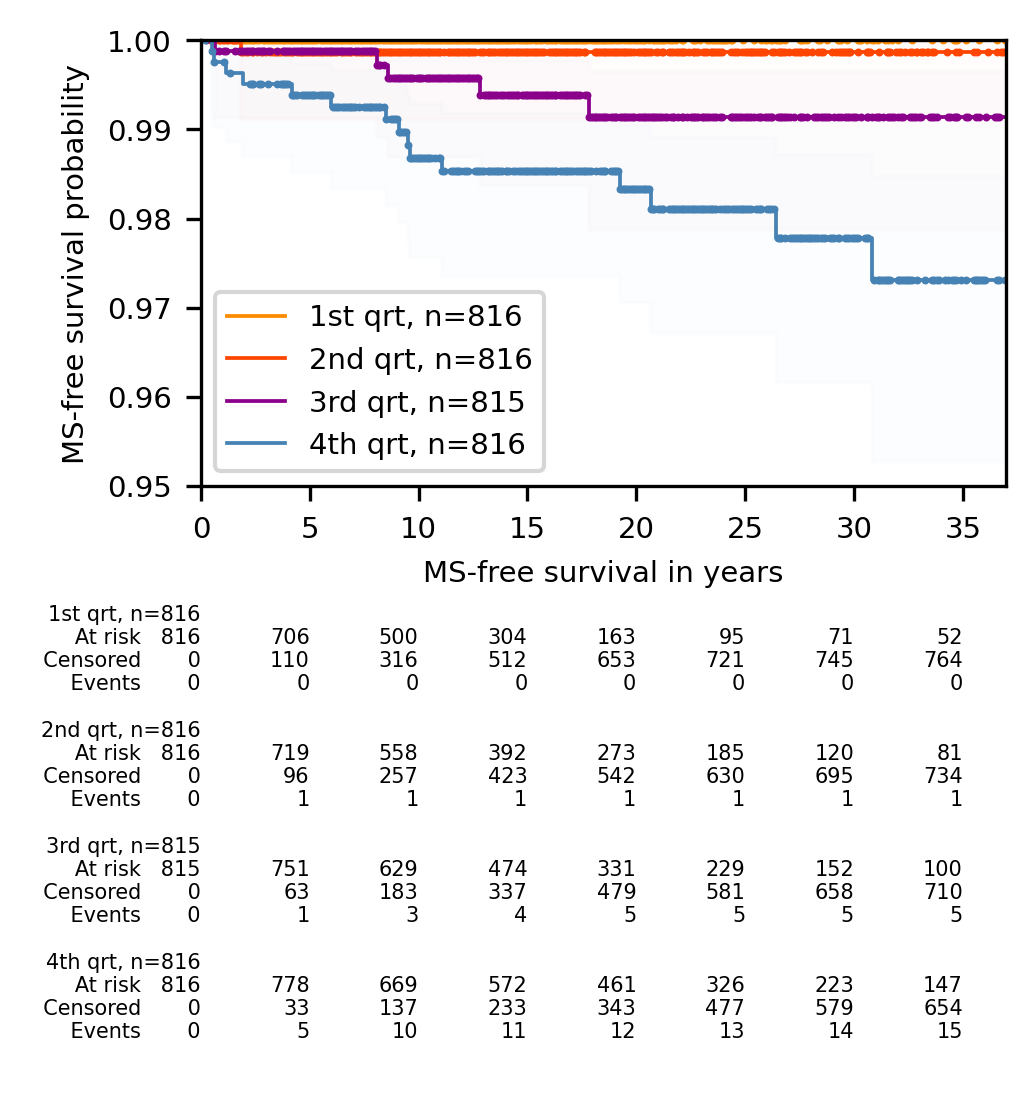

In [31]:
from survival_analysis.utilities_mod import * 
cph_data['cph_prediction'] = cph.predict_partial_hazard(cph_data)
plot_km(cph_data, cut_off_dict=cut_off_quarts,event='first_uve_MS',ylim=[.95,1],
        xlim=[0,37], time='uve_to_MS_years',
        save_label='MS_Uveitis_KM_30thMay24', plot_label = '', figsize=[col_width,col_width+0.5])

In [32]:
data.first_uve_IBD.value_counts()

0.0    483464
1.0        42
Name: first_uve_IBD, dtype: int64

In [61]:
cph_data =data.loc[((data.uve_any==1) & (data.first_MS!=1) 
                    & (data.first_AS!=1) & (data.first_IBD!=1)
                    & (data.Crohns_any!=1)),
                   ['IBD_GRS', 'first_uve_IBD','uve_to_IBD_years', 'age_uve_binary']]

In [35]:
cph_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3263 entries, 29 to 502458
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IBD_GRS           3263 non-null   float64
 1   first_uve_IBD     3263 non-null   float64
 2   uve_to_IBD_years  3263 non-null   float64
 3   age_uve_binary    3263 non-null   float64
dtypes: float64(4)
memory usage: 127.5 KB


In [ ]:
cph = CoxPHFitter()

cph = cph.fit(cph_data, duration_col='uve_to_IBD_years', event_col='first_uve_IBD')
cph.print_summary()

NameError: name 'CoxPHFitter' is not defined

In [63]:
cph.summary.round(2).to_excel('UC_uve_CPHsummary.xlsx')

In [38]:
for var, row in cph.summary.iterrows():

    print(var, "\n", round(row['exp(coef)'], 3),
          ' (', round(row['exp(coef) lower 95%'], 3), '-', round(row['exp(coef) upper 95%'],2),
          "), P=", round(row['p'], 5), sep="")

IBD_GRS
1.733 (1.035-2.9), P=0.03671
age_uve_binary
9.131 (1.156-72.15), P=0.03599


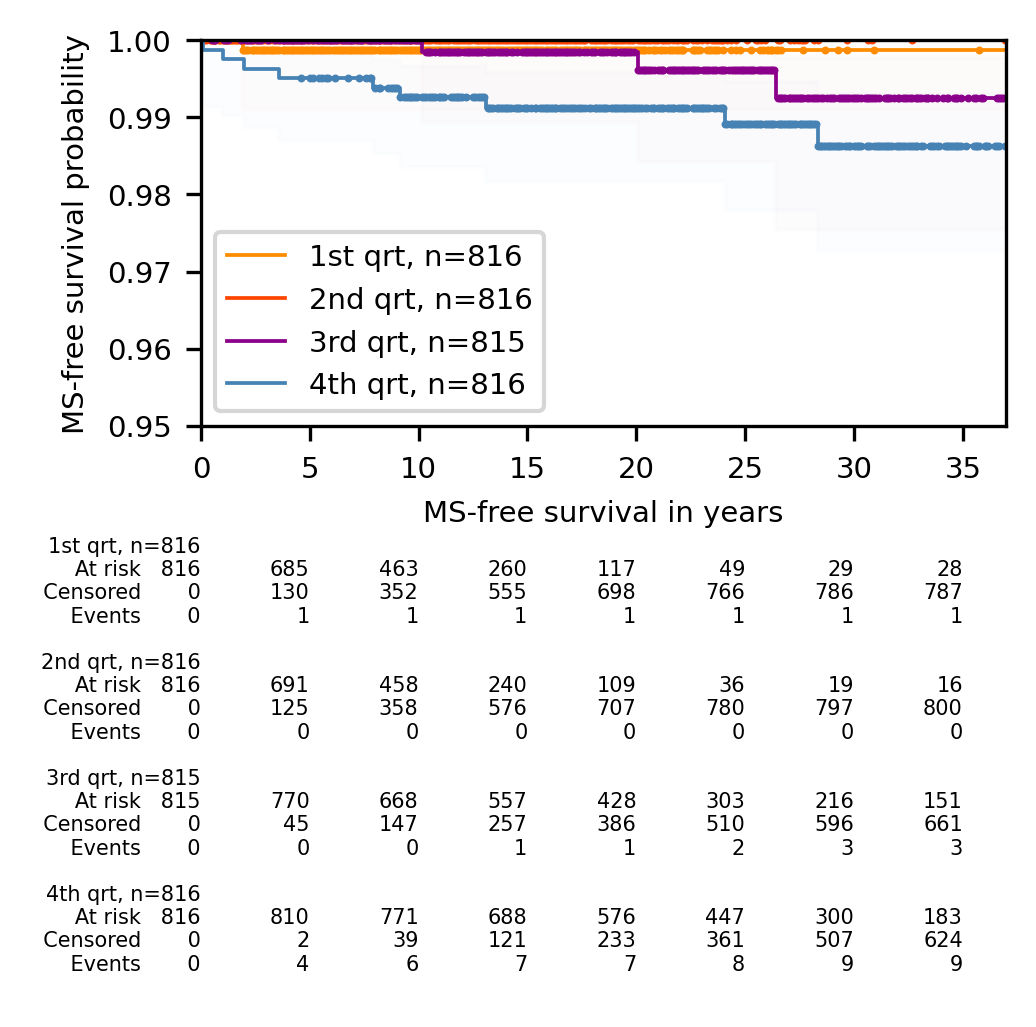

In [39]:
cph_data['cph_prediction'] = cph.predict_partial_hazard(cph_data)
plot_km(cph_data, cut_off_dict=cut_off_quarts,event='first_uve_IBD',ylim=[.95,1],
        xlim=[0,37], time='uve_to_IBD_years',
        save_label='UC_Uveitis_KM_30thMay24', plot_label = '', figsize=[col_width,col_width+0.3])


,MS_GRS,RhA_HLA_GRS,RhA_nonHLA_GRS,RhA_GRS,AS_GRS,Sarcoid_HLA_GRS,Sarcoid_GRS,SLE_GRS,IBD_GRS,first_uve_AS,...,first_GCA.1,first_MS.1,first_ON.1,first_uve_MS.2,first_uve_IBD.2,first_IBD.1,SLE_GRS.1,white_british,white,undif_uve
14,0.571720,-0.3302,0.999138,0.444110,0.052627,-0.06228,0.889703,0.770252,0.957157,NaN,...,NaN,0,NaN,NaN,NaN,0,0.770252,1.0,1.0,NaN
15,-1.180953,-0.4920,-1.227235,-1.701789,-0.211388,0.00000,0.424823,-0.800342,1.531695,NaN,...,NaN,0,NaN,NaN,NaN,0,-0.800342,NaN,NaN,NaN
16,0.283784,-0.4000,-1.061518,-1.470217,0.015450,0.69274,1.131940,-0.137047,0.190282,NaN,...,NaN,0,NaN,NaN,NaN,0,-0.137047,1.0,1.0,NaN
17,-0.976000,0.1170,-0.840054,-0.806668,-0.126341,-0.75502,0.141899,-1.025983,0.208731,NaN,...,NaN,0,NaN,NaN,NaN,0,-1.025983,1.0,1.0,NaN
18,-1.066997,-0.0218,0.535197,0.304349,-0.171000,0.00000,-0.028196,0.312037,-0.480636,NaN,...,NaN,0,NaN,NaN,NaN,0,0.312037,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502631,1.934055,0.1010,-0.737974,-0.729321,-1.249229,0.69274,1.145455,-0.480348,0.130337,NaN,...,NaN,0,NaN,NaN,NaN,0,-0.480348,1.0,1.0,NaN
502632,-1.616790,1.0148,-0.001917,0.753163,-0.752419,-2.46871,-1.646391,0.953830,0.423132,NaN,...,NaN,0,NaN,NaN,NaN,0,0.953830,1.0,1.0,NaN
502633,0.802172,1.3136,-0.970161,0.151633,-0.075031,0.69274,1.131940,-0.248407,-1.817904,NaN,...,NaN,0,NaN,NaN,NaN,0,-0.248407,1.0,1.0,NaN
502634,-1.414552,1.4084,0.008371,1.116079,1.345781,0.00000,-0.029094,-0.268984,-0.324296,NaN,...,NaN,0,NaN,NaN,NaN,0,-0.268984,1.0,1.0,NaN
